In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pickle
import obspy
from scipy.signal import find_peaks
import os
import pandas as pd

In [81]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [108]:
number_of_peaks_opt = []
magnitudes_opt = []
number_of_peaks_moy = []
magnitudes_moy = []
names_of_peaks = []

for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):

    db = combined[combined['scardec_name']==scardec_name]

    time_opt = []
    momentrate_opt = []

    time_moy = []
    momentrate_moy = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith('fctopt')]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time_opt.append(float(split[0]))
        momentrate_opt.append(float(split[1]))

    peaks_opt = find_peaks(momentrate_opt,
                       height = (None, None),
                       threshold = (None, None),
                       prominence = (None, None),
                       width = (None, None))

    starts = [n for n, l in enumerate(event) if l.startswith('fctmoy')]

    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()code/poster/max_value_in_window_scardec_poster.ipynb
    #print(lines)
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        #print(split)
        time_moy.append(float(split[0]))
        momentrate_moy.append(float(split[1]))

    peaks_moy = find_peaks(momentrate_moy,
                       height = (None, None),
                       threshold = (None, None),
                       prominence = (None, None),
                       width = (None, None))

    names_of_peaks.append(scardec_name)
    number_of_peaks_opt.append(len(peaks_opt[0]))
    magnitudes_opt.append(db.scardec_magnitude.values[0])
    number_of_peaks_moy.append(len(peaks_moy[0]))
    magnitudes_moy.append(db.scardec_magnitude.values[0])


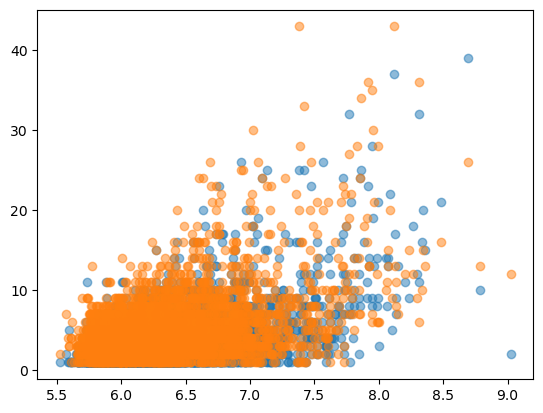

In [109]:
plt.scatter(magnitudes_opt, number_of_peaks_opt, alpha = 0.5)
plt.scatter(magnitudes_moy, number_of_peaks_moy, alpha = 0.5)

In [110]:
print(max(number_of_peaks_opt), max(number_of_peaks_moy))

39 43


In [111]:
print(np.argmax(number_of_peaks_opt), np.argmax(number_of_peaks_moy))

1126 220


In [114]:
names_of_peaks[1126]

'FCTs_20120411_083836_OFF_W_COAST_OF_NORTHERN_SUMATRA'

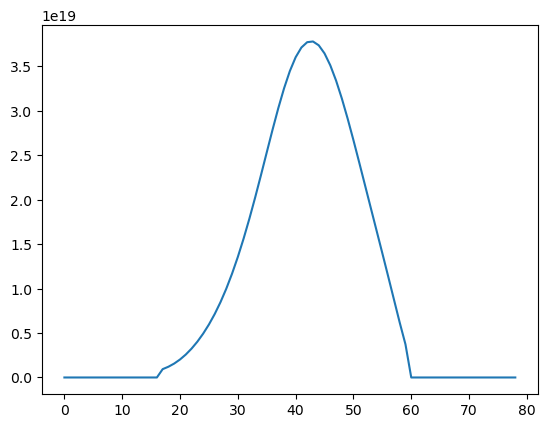

In [98]:
plt.plot(momentrate_opt)